### Step 1: Setup and Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Step 2: Load and Explore the Dataset
- Load the CSV file
- Display basic information about the dataset
- Check data types and structure

In [6]:
mall_data = pd.read_csv('Mall_Customers.xls')   
# Display the first few rows of the dataset
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

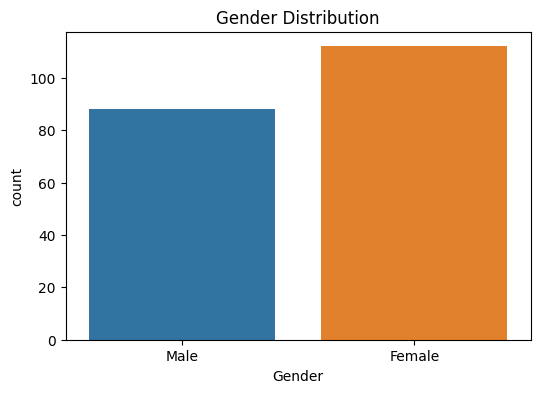

In [10]:
# Visualize Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=mall_data)
plt.title('Gender Distribution')
plt.show()

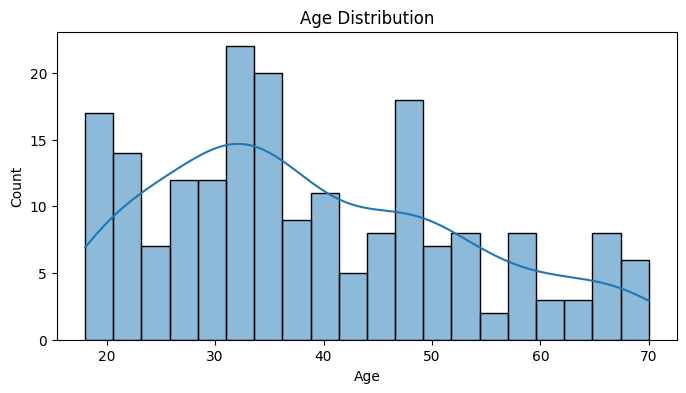

In [11]:

# Visualize Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(mall_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


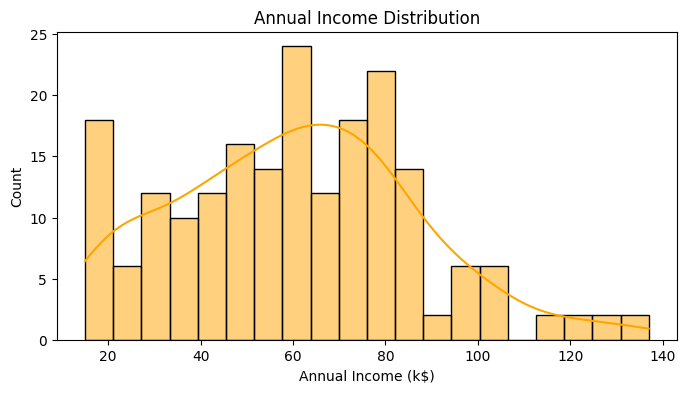

In [12]:

# Visualize Annual Income Distribution
plt.figure(figsize=(8,4))
sns.histplot(mall_data['Annual Income (k$)'], bins=20, kde=True, color='orange')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.show()



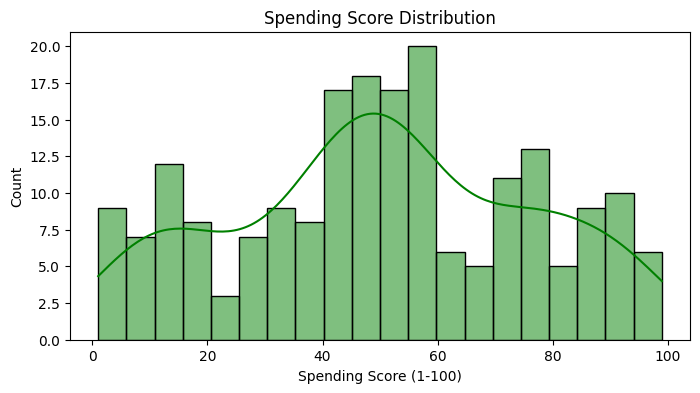

In [13]:
# Visualize Spending Score Distribution
plt.figure(figsize=(8,4))
sns.histplot(mall_data['Spending Score (1-100)'], bins=20, kde=True, color='green')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.show()



c:\Users\George\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


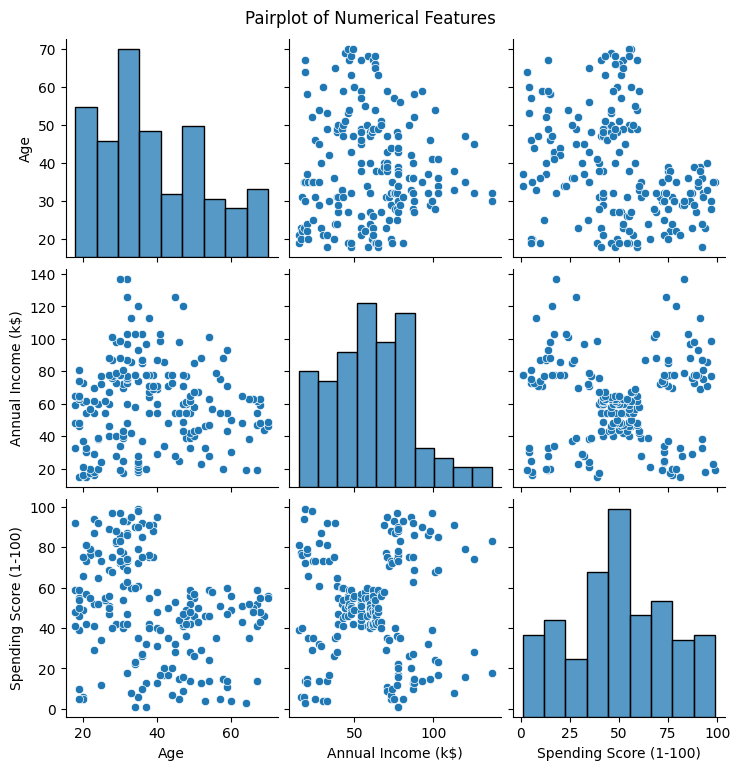

In [14]:
# Pairplot of Numerical Features
sns.pairplot(mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()



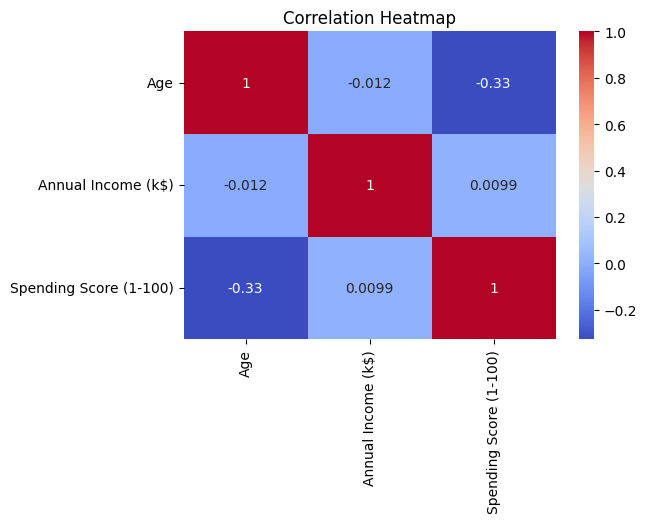

In [15]:
# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

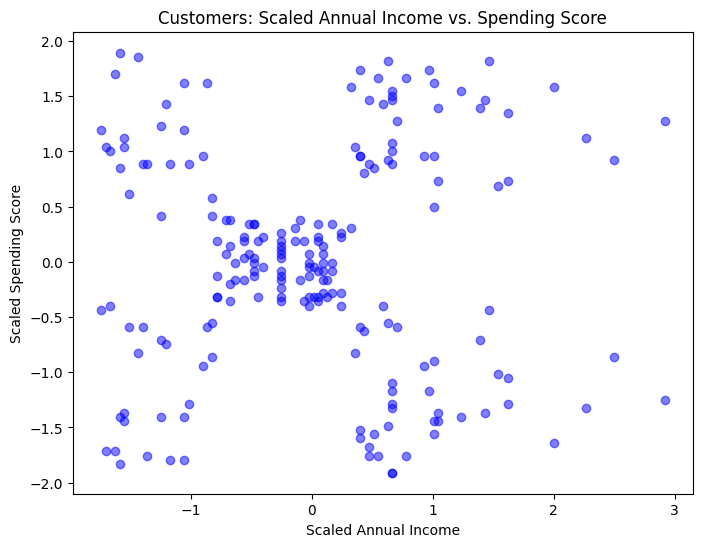

In [16]:
# Step 1: Scaling and Visual Exploration

from sklearn.preprocessing import StandardScaler

# Extract features
X = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the scaled features
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue', alpha=0.5)
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.title('Customers: Scaled Annual Income vs. Spending Score')
plt.show()

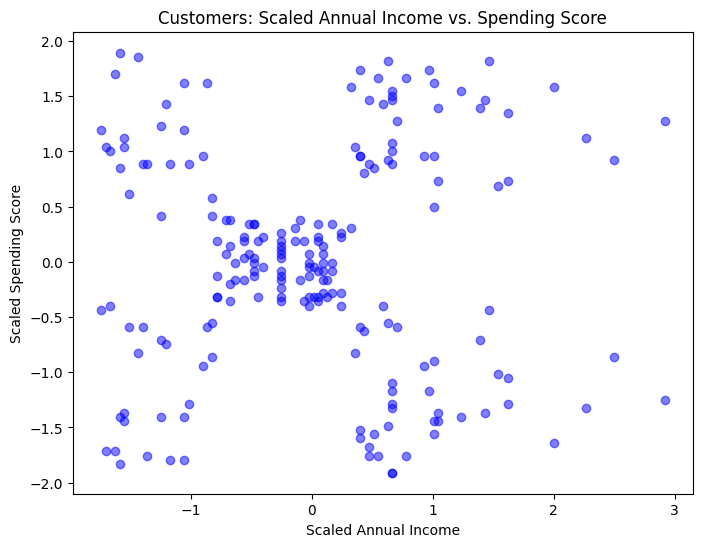

In [17]:
# Step 1: Scaling and Visual Exploration

from sklearn.preprocessing import StandardScaler

# Extract features
X = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the scaled features
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue', alpha=0.5)
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.title('Customers: Scaled Annual Income vs. Spending Score')
plt.show()

c:\Users\George\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


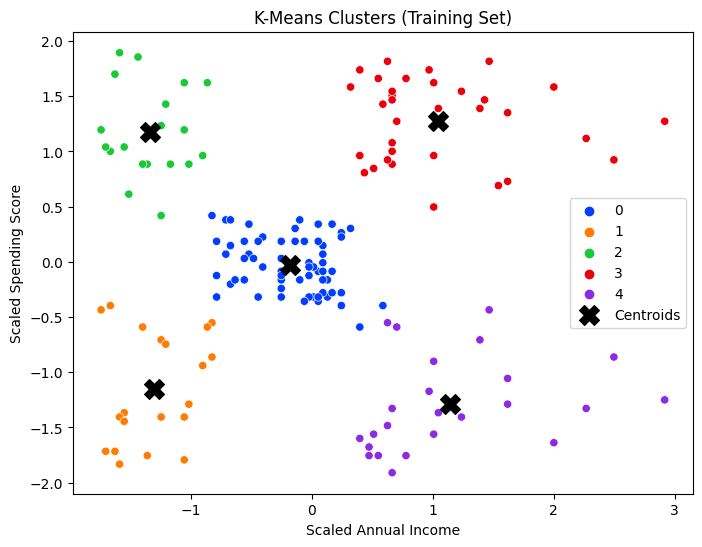

In [20]:
# Split the data into train and test sets before clustering
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Use only the scaled features for clustering
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Train KMeans on the training set
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_train = kmeans.fit_predict(X_train)

# Predict clusters for the test set
clusters_test = kmeans.predict(X_test)

# Visualize clusters for the training set
plt.figure(figsize=(8,6))
palette = sns.color_palette('bright', optimal_k)
sns.scatterplot(
    x=X_train[:, 0], y=X_train[:, 1],
    hue=clusters_train, palette=palette, legend='full'
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.title('K-Means Clusters (Training Set)')
plt.legend()

In [21]:
# Evaluate clustering performance using silhouette score (since clustering is unsupervised)
from sklearn.metrics import silhouette_score

# Silhouette score for training set
silhouette_train = silhouette_score(X_train, clusters_train)
print(f"Silhouette Score (Train): {silhouette_train:.3f}")

# Silhouette score for test set
silhouette_test = silhouette_score(X_test, clusters_test)
print(f"Silhouette Score (Test): {silhouette_test:.3f}")

Silhouette Score (Train): 0.551
Silhouette Score (Test): 0.567


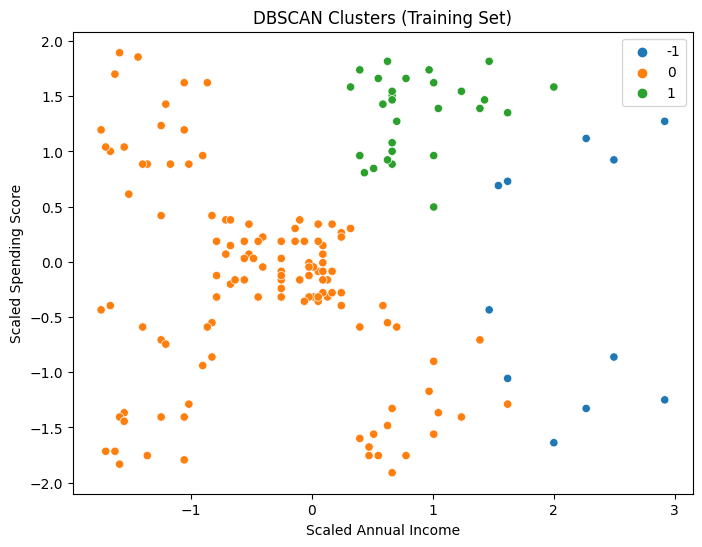

DBSCAN Silhouette Score (Train, no noise): 0.405
DBSCAN Silhouette Score (Test, no noise): 0.708


In [22]:
# Import DBSCAN
from sklearn.cluster import DBSCAN

# Fit DBSCAN on the training set
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_train_dbscan = dbscan.fit_predict(X_train)

# Predict clusters for the test set using the same DBSCAN model
# Note: DBSCAN does not have a predict method for new data, so we fit separately for demonstration
clusters_test_dbscan = DBSCAN(eps=0.5, min_samples=5).fit_predict(X_test)

# Visualize DBSCAN clusters for the training set
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_train[:, 0], y=X_train[:, 1],
    hue=clusters_train_dbscan, palette='tab10', legend='full'
)
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.title('DBSCAN Clusters (Training Set)')
plt.legend()
plt.show()

# Evaluate clustering performance using silhouette score
from sklearn.metrics import silhouette_score

# Silhouette score for training set (ignore noise points labeled as -1)
mask_train = clusters_train_dbscan != -1
if mask_train.sum() > 1:
    silhouette_train_dbscan = silhouette_score(X_train[mask_train], clusters_train_dbscan[mask_train])
    print(f"DBSCAN Silhouette Score (Train, no noise): {silhouette_train_dbscan:.3f}")
else:
    print("Not enough clusters for silhouette score on train set.")

# Silhouette score for test set (ignore noise points labeled as -1)
mask_test = clusters_test_dbscan != -1
if mask_test.sum() > 1:
    silhouette_test_dbscan = silhouette_score(X_test[mask_test], clusters_test_dbscan[mask_test])
    print(f"DBSCAN Silhouette Score (Test, no noise): {silhouette_test_dbscan:.3f}")
else:
    print("Not enough clusters for silhouette score on test set.")

In [23]:
# Analyze average spending per cluster for KMeans

# Assign cluster labels to the original DataFrame (for all data)
mall_data['KMeans_Cluster'] = kmeans.predict(X_scaled)

# Calculate average spending score per cluster
avg_spending_per_cluster = mall_data.groupby('KMeans_Cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score per KMeans Cluster:")
print(avg_spending_per_cluster)

# Optionally, show cluster sizes
cluster_sizes = mall_data['KMeans_Cluster'].value_counts().sort_index()
print("\nNumber of Customers per KMeans Cluster:")
print(cluster_sizes)

Average Spending Score per KMeans Cluster:
KMeans_Cluster
0    49.518519
1    20.913043
2    79.363636
3    82.128205
4    17.114286
Name: Spending Score (1-100), dtype: float64

Number of Customers per KMeans Cluster:
KMeans_Cluster
0    81
1    23
2    22
3    39
4    35
Name: count, dtype: int64


Text(0.5, 1.0, 'Average Spending Score per KMeans Cluster')

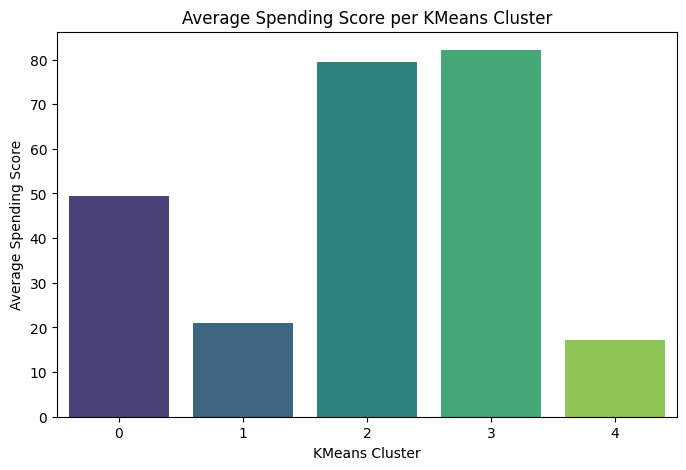

In [24]:
# Visualize average spending score per KMeans cluster

plt.figure(figsize=(8,5))
sns.barplot(
    x=avg_spending_per_cluster.index,
    y=avg_spending_per_cluster.values,
    palette='viridis'
)
plt.xlabel('KMeans Cluster')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score per KMeans Cluster')